In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

avo = pd.read_csv("./DS-Notebooks-Summer-2022/week1/Data/avocado.csv")

In [3]:
print(avo.keys())

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [4]:
avo = avo[["Date", "AveragePrice", "region"]]

In [5]:
avo.head()

,Date,AveragePrice,region
0,2015-12-27,1.33,Albany
1,2015-12-20,1.35,Albany
2,2015-12-13,0.93,Albany
3,2015-12-06,1.08,Albany
4,2015-11-29,1.28,Albany


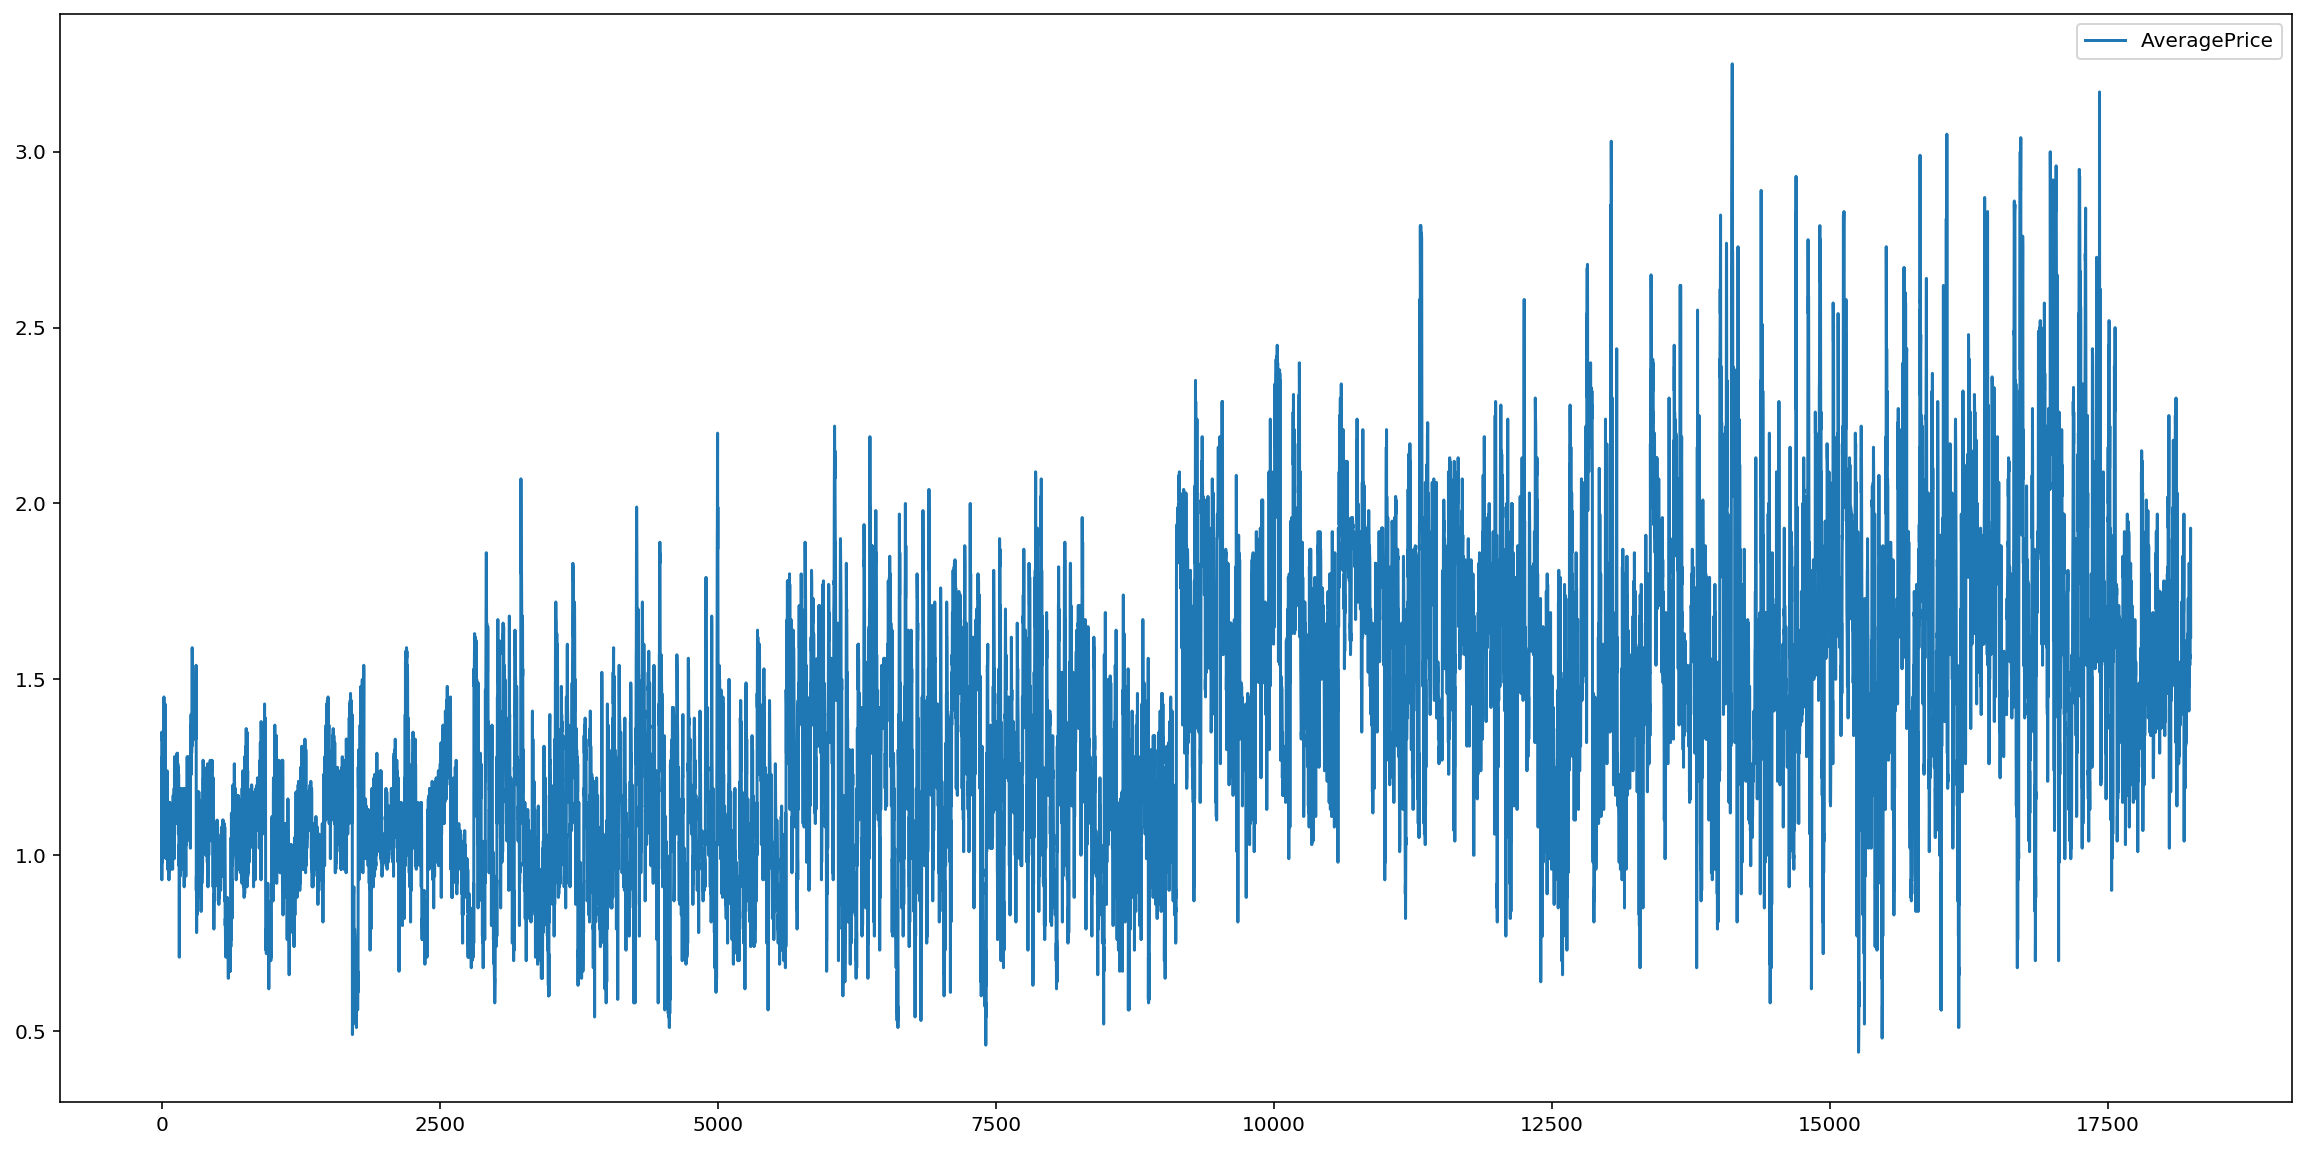

In [6]:
avo.plot()

In [7]:
nyavo = avo[avo["region"]== "NewYork"]
nyavo.head()

,Date,AveragePrice,region
1456,2015-12-27,1.17,NewYork
1457,2015-12-20,1.23,NewYork
1458,2015-12-13,1.12,NewYork
1459,2015-12-06,1.20,NewYork
1460,2015-11-29,1.16,NewYork


In [8]:
ad = nyavo[["Date", "AveragePrice"]]

In [9]:
ad.head()

,Date,AveragePrice
1456,2015-12-27,1.17
1457,2015-12-20,1.23
1458,2015-12-13,1.12
1459,2015-12-06,1.20
1460,2015-11-29,1.16


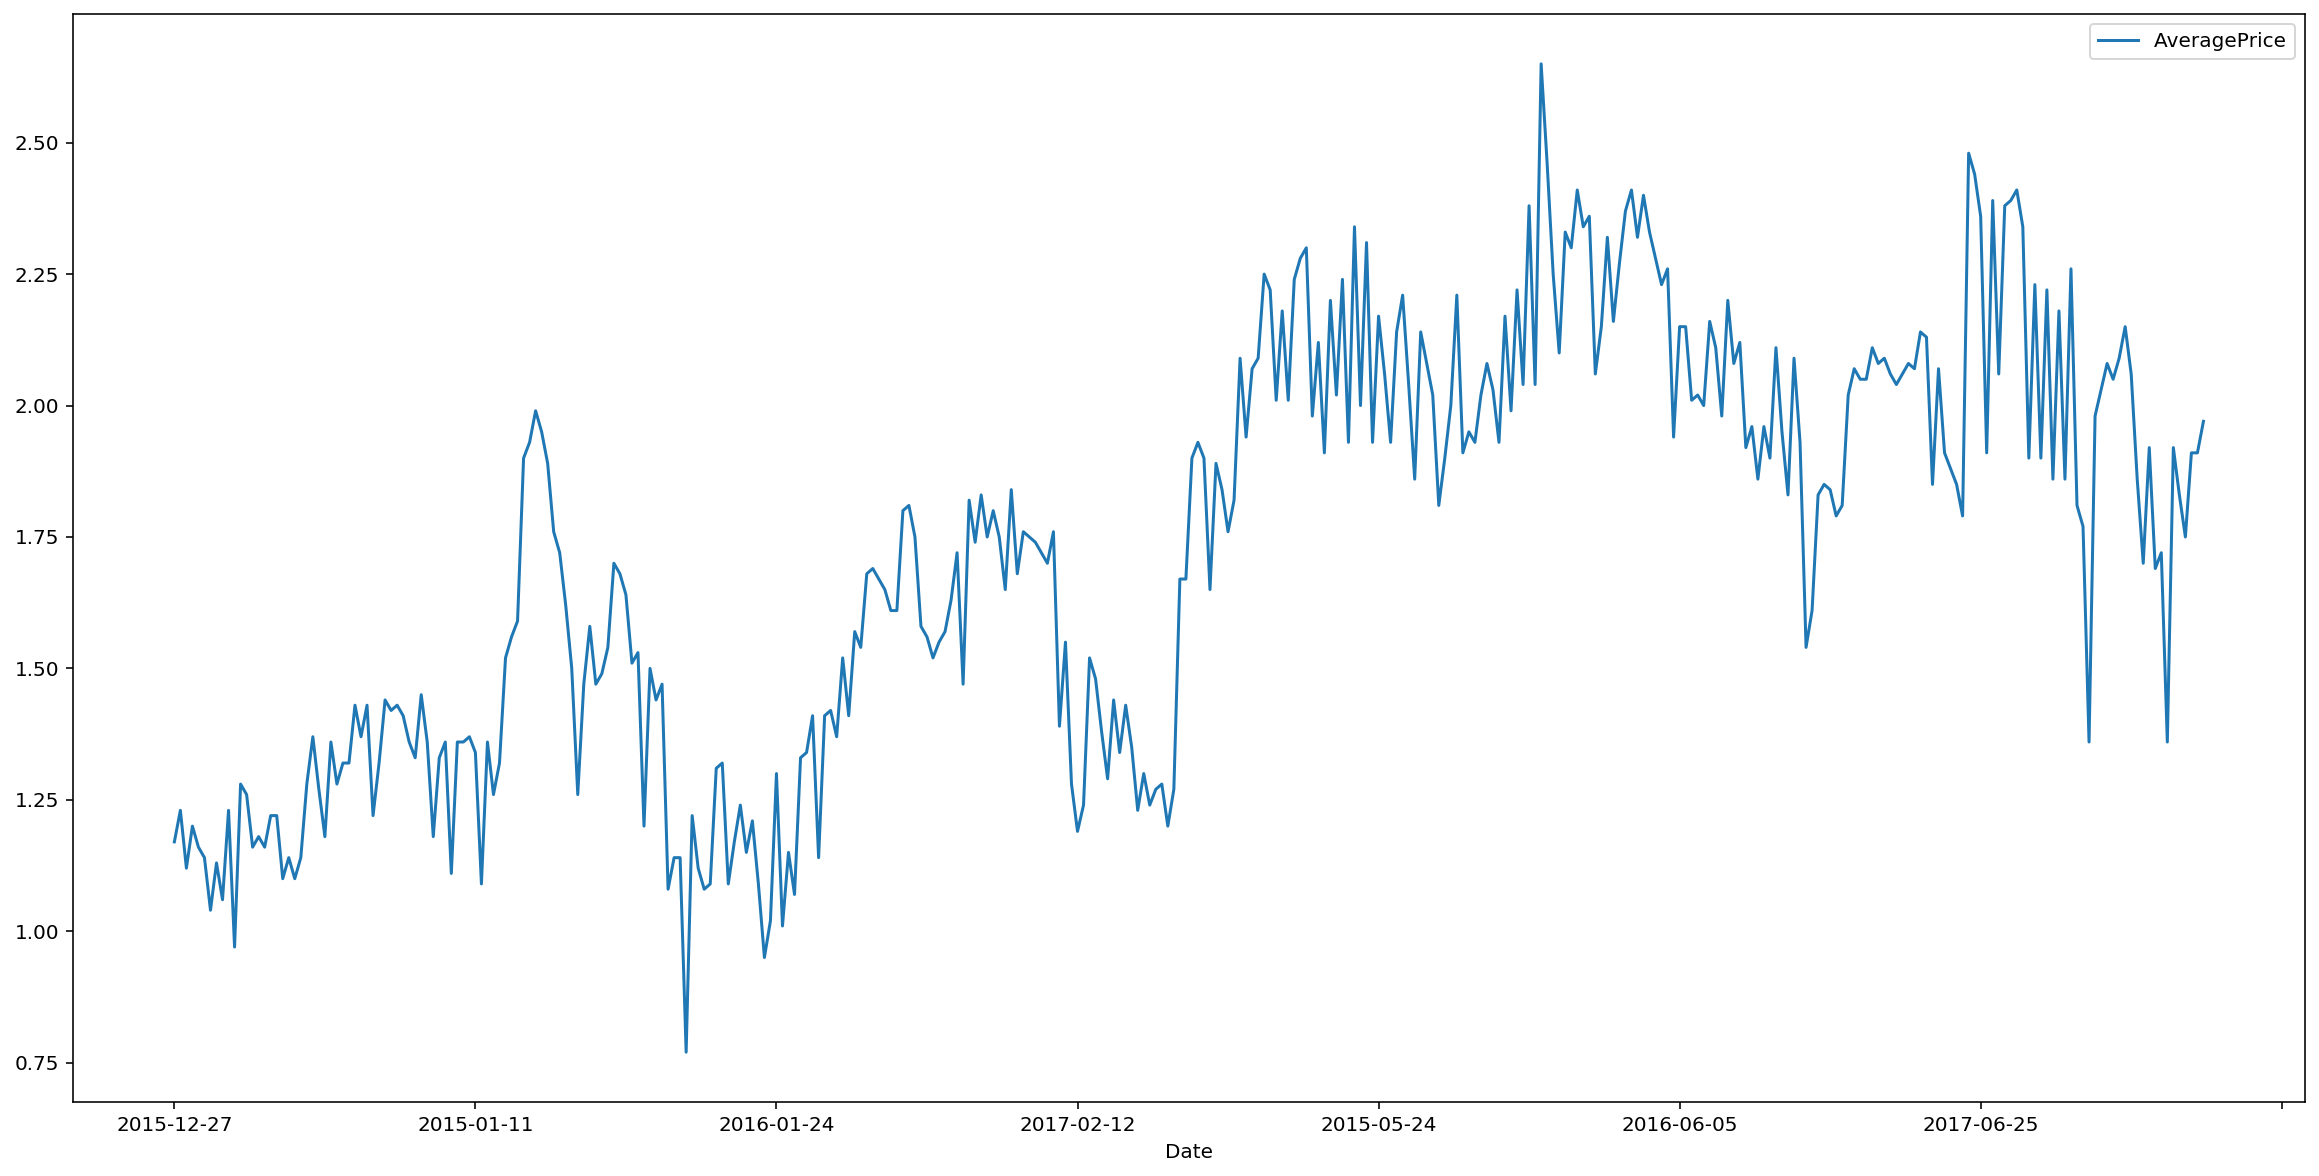

In [10]:
ad.index = ad["Date"]
ad.plot()

In [11]:
np.random.seed(7)

In [12]:
s = MinMaxScaler(feature_range=(0, 1))
ad.index = ad.Date
ad = ad.drop("Date",axis=1)
ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 2015-12-27 to 2018-01-07
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  338 non-null    float64
dtypes: float64(1)
memory usage: 5.3+ KB


In [13]:
dataset = ad["AveragePrice"].values
dataset = dataset.reshape(dataset.shape[0],1)
dataset.shape

(338, 1)

In [14]:
dataset = s.fit_transform(dataset)

In [15]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train.shape, test.shape

((270, 1), (68, 1))

In [16]:
def cd(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
look_back = 25
trainX, trainY = cd(train, look_back)
testX, testY = cd(test, look_back)
trainX.shape,trainY.shape,testX.shape,testY.shape


trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape,testX.shape

((244, 1, 25), (42, 1, 25))

In [18]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


244/244 - 2s - loss: 0.1171 - 2s/epoch - 9ms/step


Epoch 2/100


244/244 - 0s - loss: 0.0157 - 405ms/epoch - 2ms/step


Epoch 3/100


244/244 - 0s - loss: 0.0130 - 483ms/epoch - 2ms/step


Epoch 4/100


244/244 - 0s - loss: 0.0109 - 396ms/epoch - 2ms/step


Epoch 5/100


244/244 - 0s - loss: 0.0100 - 362ms/epoch - 1ms/step


Epoch 6/100


244/244 - 0s - loss: 0.0091 - 352ms/epoch - 1ms/step


Epoch 7/100


244/244 - 0s - loss: 0.0084 - 383ms/epoch - 2ms/step


Epoch 8/100


244/244 - 1s - loss: 0.0084 - 566ms/epoch - 2ms/step


Epoch 9/100


244/244 - 0s - loss: 0.0079 - 379ms/epoch - 2ms/step


Epoch 10/100


244/244 - 1s - loss: 0.0076 - 545ms/epoch - 2ms/step


Epoch 11/100


244/244 - 0s - loss: 0.0075 - 352ms/epoch - 1ms/step


Epoch 12/100


244/244 - 0s - loss: 0.0075 - 336ms/epoch - 1ms/step


Epoch 13/100


244/244 - 0s - loss: 0.0071 - 390ms/epoch - 2ms/step


Epoch 14/100


244/244 - 0s - loss: 0.0070 - 371ms/epoch - 2ms/step


Epoch 15/100


244/244 - 0s - loss: 0.0069 - 355ms/epoch - 1ms/step


Epoch 16/100


244/244 - 0s - loss: 0.0068 - 351ms/epoch - 1ms/step


Epoch 17/100


244/244 - 0s - loss: 0.0067 - 342ms/epoch - 1ms/step


Epoch 18/100


244/244 - 0s - loss: 0.0066 - 425ms/epoch - 2ms/step


Epoch 19/100


244/244 - 0s - loss: 0.0065 - 363ms/epoch - 1ms/step


Epoch 20/100


244/244 - 0s - loss: 0.0066 - 382ms/epoch - 2ms/step


Epoch 21/100


244/244 - 0s - loss: 0.0063 - 348ms/epoch - 1ms/step


Epoch 22/100


244/244 - 0s - loss: 0.0066 - 342ms/epoch - 1ms/step


Epoch 23/100


244/244 - 0s - loss: 0.0064 - 440ms/epoch - 2ms/step


Epoch 24/100


244/244 - 0s - loss: 0.0063 - 351ms/epoch - 1ms/step


Epoch 25/100


244/244 - 0s - loss: 0.0061 - 322ms/epoch - 1ms/step


Epoch 26/100


244/244 - 0s - loss: 0.0065 - 358ms/epoch - 1ms/step


Epoch 27/100


244/244 - 0s - loss: 0.0064 - 491ms/epoch - 2ms/step


Epoch 28/100


244/244 - 1s - loss: 0.0065 - 572ms/epoch - 2ms/step


Epoch 29/100


244/244 - 0s - loss: 0.0063 - 329ms/epoch - 1ms/step


Epoch 30/100


244/244 - 0s - loss: 0.0061 - 357ms/epoch - 1ms/step


Epoch 31/100


244/244 - 0s - loss: 0.0060 - 358ms/epoch - 1ms/step


Epoch 32/100


244/244 - 0s - loss: 0.0060 - 351ms/epoch - 1ms/step


Epoch 33/100


244/244 - 0s - loss: 0.0060 - 369ms/epoch - 2ms/step


Epoch 34/100


244/244 - 0s - loss: 0.0062 - 369ms/epoch - 2ms/step


Epoch 35/100


244/244 - 0s - loss: 0.0059 - 388ms/epoch - 2ms/step


Epoch 36/100


244/244 - 0s - loss: 0.0060 - 351ms/epoch - 1ms/step


Epoch 37/100


244/244 - 0s - loss: 0.0060 - 406ms/epoch - 2ms/step


Epoch 38/100


244/244 - 0s - loss: 0.0056 - 354ms/epoch - 1ms/step


Epoch 39/100


244/244 - 0s - loss: 0.0060 - 415ms/epoch - 2ms/step


Epoch 40/100


244/244 - 0s - loss: 0.0061 - 391ms/epoch - 2ms/step


Epoch 41/100


244/244 - 0s - loss: 0.0058 - 348ms/epoch - 1ms/step


Epoch 42/100


244/244 - 0s - loss: 0.0056 - 385ms/epoch - 2ms/step


Epoch 43/100


244/244 - 0s - loss: 0.0059 - 344ms/epoch - 1ms/step


Epoch 44/100


244/244 - 0s - loss: 0.0060 - 361ms/epoch - 1ms/step


Epoch 45/100


244/244 - 0s - loss: 0.0060 - 377ms/epoch - 2ms/step


Epoch 46/100


244/244 - 0s - loss: 0.0058 - 354ms/epoch - 1ms/step


Epoch 47/100


244/244 - 0s - loss: 0.0060 - 385ms/epoch - 2ms/step


Epoch 48/100


244/244 - 0s - loss: 0.0058 - 355ms/epoch - 1ms/step


Epoch 49/100


244/244 - 0s - loss: 0.0058 - 370ms/epoch - 2ms/step


Epoch 50/100


244/244 - 0s - loss: 0.0056 - 399ms/epoch - 2ms/step


Epoch 51/100


244/244 - 1s - loss: 0.0059 - 540ms/epoch - 2ms/step


Epoch 52/100


244/244 - 0s - loss: 0.0055 - 398ms/epoch - 2ms/step


Epoch 53/100


244/244 - 0s - loss: 0.0055 - 415ms/epoch - 2ms/step


Epoch 54/100


244/244 - 0s - loss: 0.0058 - 405ms/epoch - 2ms/step


Epoch 55/100


244/244 - 0s - loss: 0.0058 - 350ms/epoch - 1ms/step


Epoch 56/100


244/244 - 0s - loss: 0.0056 - 387ms/epoch - 2ms/step


Epoch 57/100


244/244 - 0s - loss: 0.0058 - 451ms/epoch - 2ms/step


Epoch 58/100


244/244 - 0s - loss: 0.0054 - 408ms/epoch - 2ms/step


Epoch 59/100


244/244 - 0s - loss: 0.0059 - 368ms/epoch - 2ms/step


Epoch 60/100


244/244 - 0s - loss: 0.0056 - 397ms/epoch - 2ms/step


Epoch 61/100


244/244 - 0s - loss: 0.0057 - 352ms/epoch - 1ms/step


Epoch 62/100


244/244 - 0s - loss: 0.0058 - 414ms/epoch - 2ms/step


Epoch 63/100


244/244 - 0s - loss: 0.0057 - 421ms/epoch - 2ms/step


Epoch 64/100


244/244 - 1s - loss: 0.0056 - 519ms/epoch - 2ms/step


Epoch 65/100


244/244 - 0s - loss: 0.0055 - 358ms/epoch - 1ms/step


Epoch 66/100


244/244 - 0s - loss: 0.0056 - 380ms/epoch - 2ms/step


Epoch 67/100


244/244 - 0s - loss: 0.0056 - 400ms/epoch - 2ms/step


Epoch 68/100


244/244 - 0s - loss: 0.0056 - 380ms/epoch - 2ms/step


Epoch 69/100


244/244 - 0s - loss: 0.0056 - 427ms/epoch - 2ms/step


Epoch 70/100


244/244 - 0s - loss: 0.0054 - 335ms/epoch - 1ms/step


Epoch 71/100


244/244 - 0s - loss: 0.0053 - 396ms/epoch - 2ms/step


Epoch 72/100


244/244 - 0s - loss: 0.0053 - 337ms/epoch - 1ms/step


Epoch 73/100


244/244 - 0s - loss: 0.0057 - 370ms/epoch - 2ms/step


Epoch 74/100


244/244 - 0s - loss: 0.0058 - 378ms/epoch - 2ms/step


Epoch 75/100


244/244 - 0s - loss: 0.0055 - 380ms/epoch - 2ms/step


Epoch 76/100


244/244 - 0s - loss: 0.0055 - 466ms/epoch - 2ms/step


Epoch 77/100


244/244 - 0s - loss: 0.0053 - 399ms/epoch - 2ms/step


Epoch 78/100


244/244 - 0s - loss: 0.0056 - 444ms/epoch - 2ms/step


Epoch 79/100


244/244 - 0s - loss: 0.0055 - 419ms/epoch - 2ms/step


Epoch 80/100


244/244 - 1s - loss: 0.0056 - 531ms/epoch - 2ms/step


Epoch 81/100


244/244 - 0s - loss: 0.0054 - 476ms/epoch - 2ms/step


Epoch 82/100


244/244 - 1s - loss: 0.0055 - 556ms/epoch - 2ms/step


Epoch 83/100


244/244 - 0s - loss: 0.0054 - 483ms/epoch - 2ms/step


Epoch 84/100


244/244 - 1s - loss: 0.0054 - 529ms/epoch - 2ms/step


Epoch 85/100


244/244 - 0s - loss: 0.0054 - 485ms/epoch - 2ms/step


Epoch 86/100


244/244 - 0s - loss: 0.0055 - 390ms/epoch - 2ms/step


Epoch 87/100


244/244 - 0s - loss: 0.0055 - 388ms/epoch - 2ms/step


Epoch 88/100


244/244 - 0s - loss: 0.0056 - 438ms/epoch - 2ms/step


Epoch 89/100


244/244 - 0s - loss: 0.0053 - 392ms/epoch - 2ms/step


Epoch 90/100


244/244 - 0s - loss: 0.0054 - 381ms/epoch - 2ms/step


Epoch 91/100


244/244 - 0s - loss: 0.0052 - 427ms/epoch - 2ms/step


Epoch 92/100


244/244 - 0s - loss: 0.0055 - 498ms/epoch - 2ms/step


Epoch 93/100


244/244 - 0s - loss: 0.0052 - 421ms/epoch - 2ms/step


Epoch 94/100


244/244 - 1s - loss: 0.0053 - 531ms/epoch - 2ms/step


Epoch 95/100


244/244 - 1s - loss: 0.0054 - 724ms/epoch - 3ms/step


Epoch 96/100


244/244 - 0s - loss: 0.0053 - 453ms/epoch - 2ms/step


Epoch 97/100


244/244 - 0s - loss: 0.0054 - 491ms/epoch - 2ms/step


Epoch 98/100


244/244 - 0s - loss: 0.0054 - 413ms/epoch - 2ms/step


Epoch 99/100


244/244 - 0s - loss: 0.0054 - 471ms/epoch - 2ms/step


Epoch 100/100


244/244 - 1s - loss: 0.0054 - 576ms/epoch - 2ms/step


In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = s.inverse_transform(trainPredict)
trainY = s.inverse_transform([trainY])
testPredict = s.inverse_transform(testPredict)
testY = s.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/8 [==>...........................] - ETA: 5s

8/8 [==============================] - 1s 5ms/step


1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 7ms/step


Train Score: 0.13 RMSE
Test Score: 0.25 RMSE


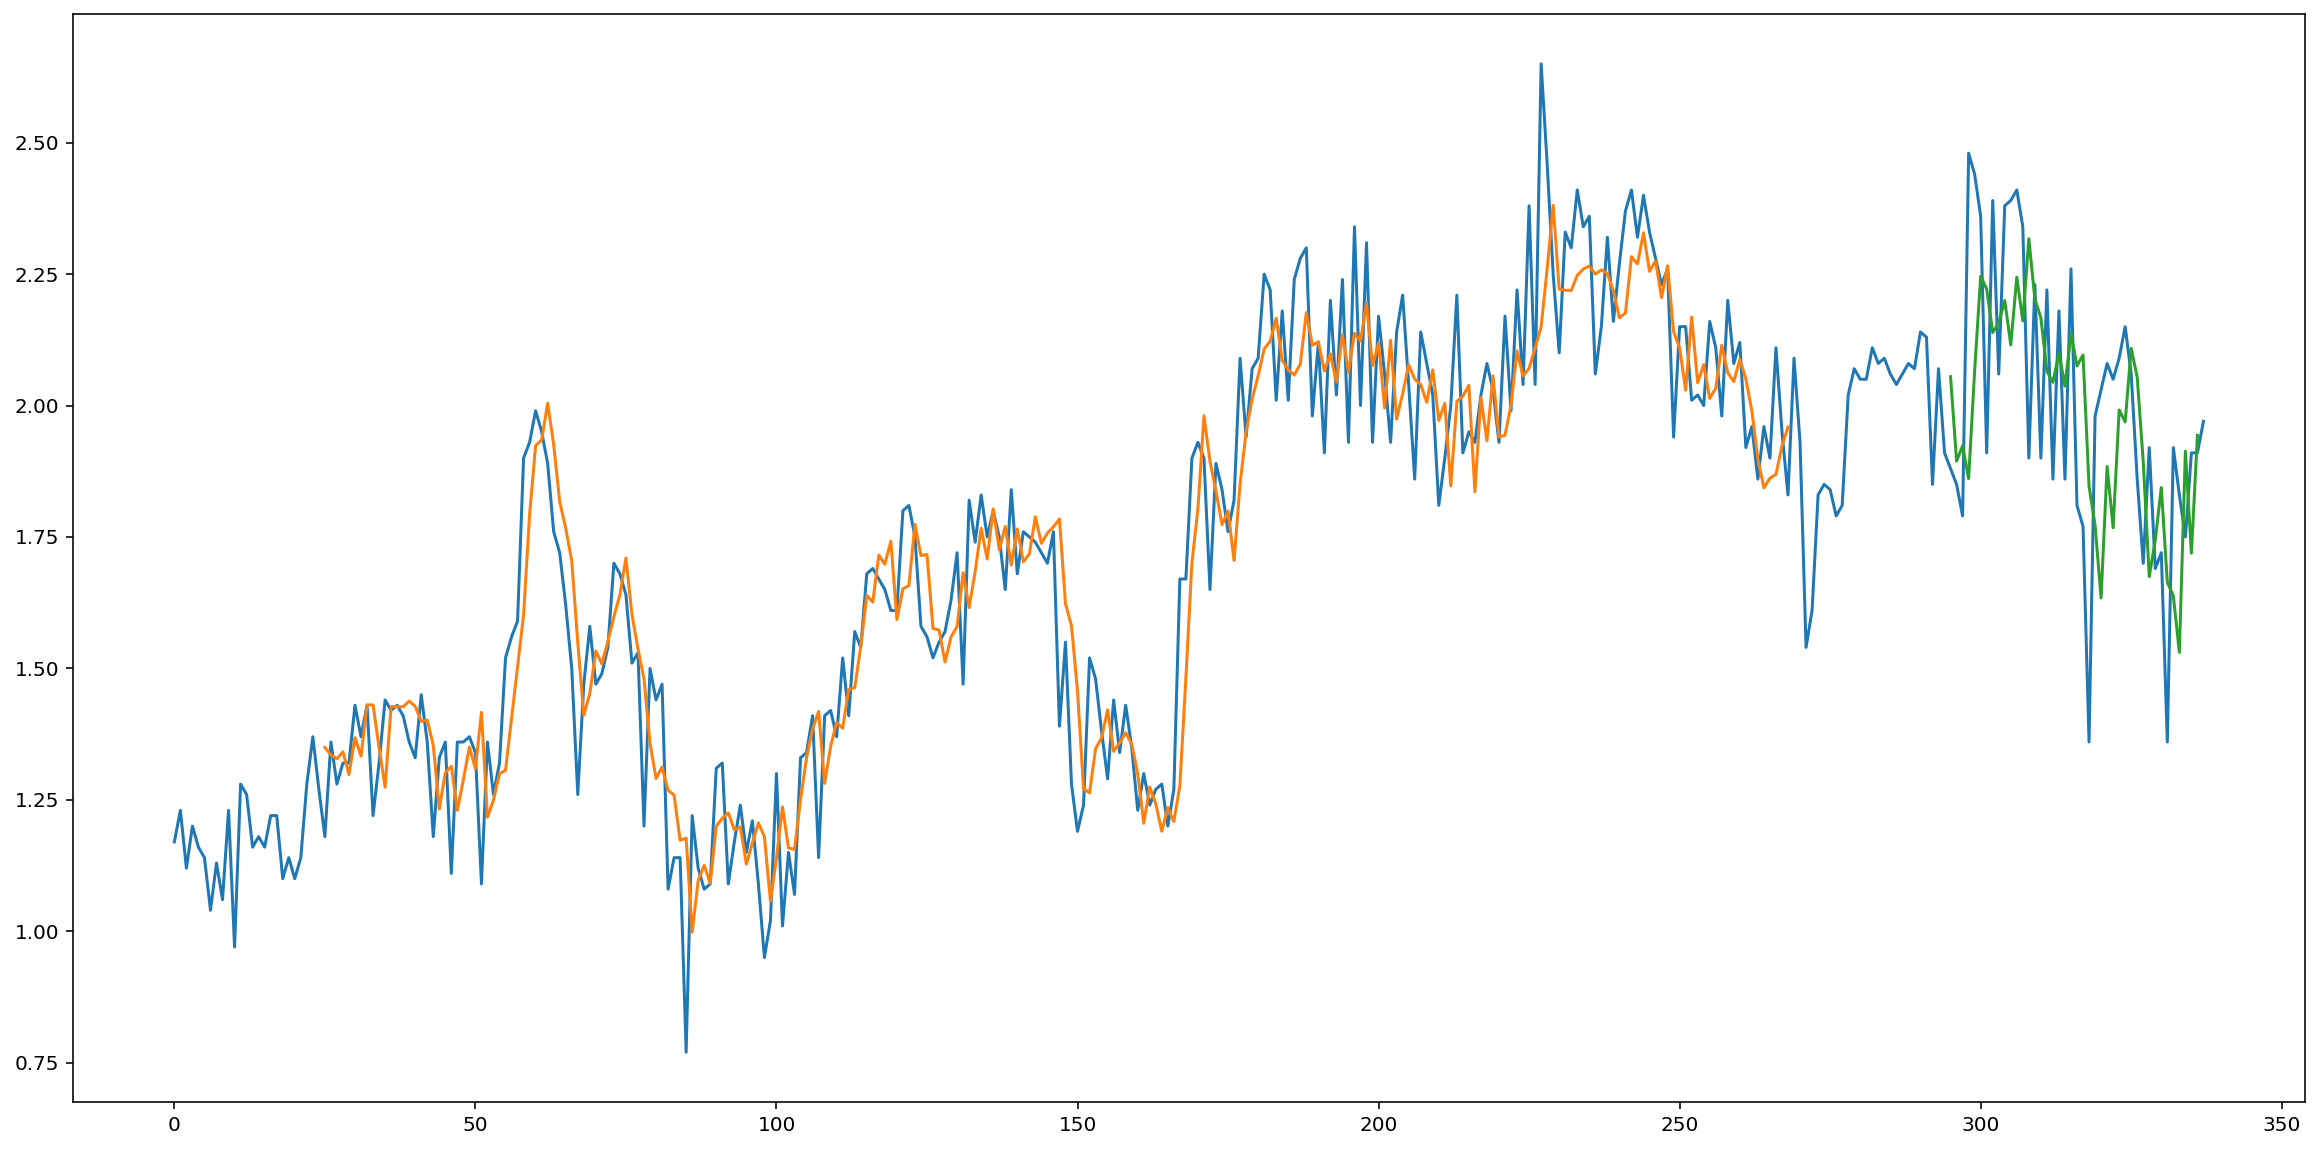

In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(s.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()